# Session Analysis Example
This notebook demonstrates detailed analysis functions for single session behavioral data

In [3]:
import matplotlib.pyplot as plt
from ethopy_analysis.data.utils import get_setup
from ethopy_analysis.data.loaders import get_sessions
from ethopy_analysis.data.analysis import session_summary
from ethopy_analysis.plots import (
    difficultyPlot,
    LickPlot,
    plot_licks_state,
    plot_first_lick_after,
    valid_ready_state,
    plot_valid_proximity_state,
    plot_proximities_dur,
    calculate_proximity_duration,
    plot_trial_time,
    liquidsPlot,
    plot_states_in_time,
    plot_licks_time
)

# Apply plot styling (optional)
from ethopy_analysis.config.styles import Style
Style().apply()

In [4]:
# Get animal and session data from setup
# get_setup() retrieves animal_id and session for a given setup identifier
# Parameters: setup (str)
# Returns: Tuple[int, int] - (animal_id, session)

animal_id, session = get_setup("ef-rp13")

# session_summary() prints comprehensive session information
# Parameters: animal_id (int), session (int)
# Displays: metadata, performance, trial count, experiment details
session_summary(animal_id, session)

# Alternative: manually specify animal and get last session
# animal_id = x
# sessions = get_sessions(animal_id, min_trials=2)
# session = sessions['session'].iloc[-1]
# session_summary(animal_id, session)

[2025-07-16 10:46:20,852][INFO]: DataJoint 0.14.4 connected to eflab@database.eflab.org:3306


Animal id: 290, session: 46
User name: bot
Setup: ef-rp13
Session start: 2025-07-16 10:42:14
Session duration: 4.20 minutes (252.0 seconds)

Experiment:  MatchPort
Stimulus:  Panda
Behavior:  MultiPort

Task filename: 2object_detection_visual-dif0-1.py
Git hash: b06989f

Session performance: 0.9583333333333334
Number of trials: 62


difficulty 0: performance 0.96


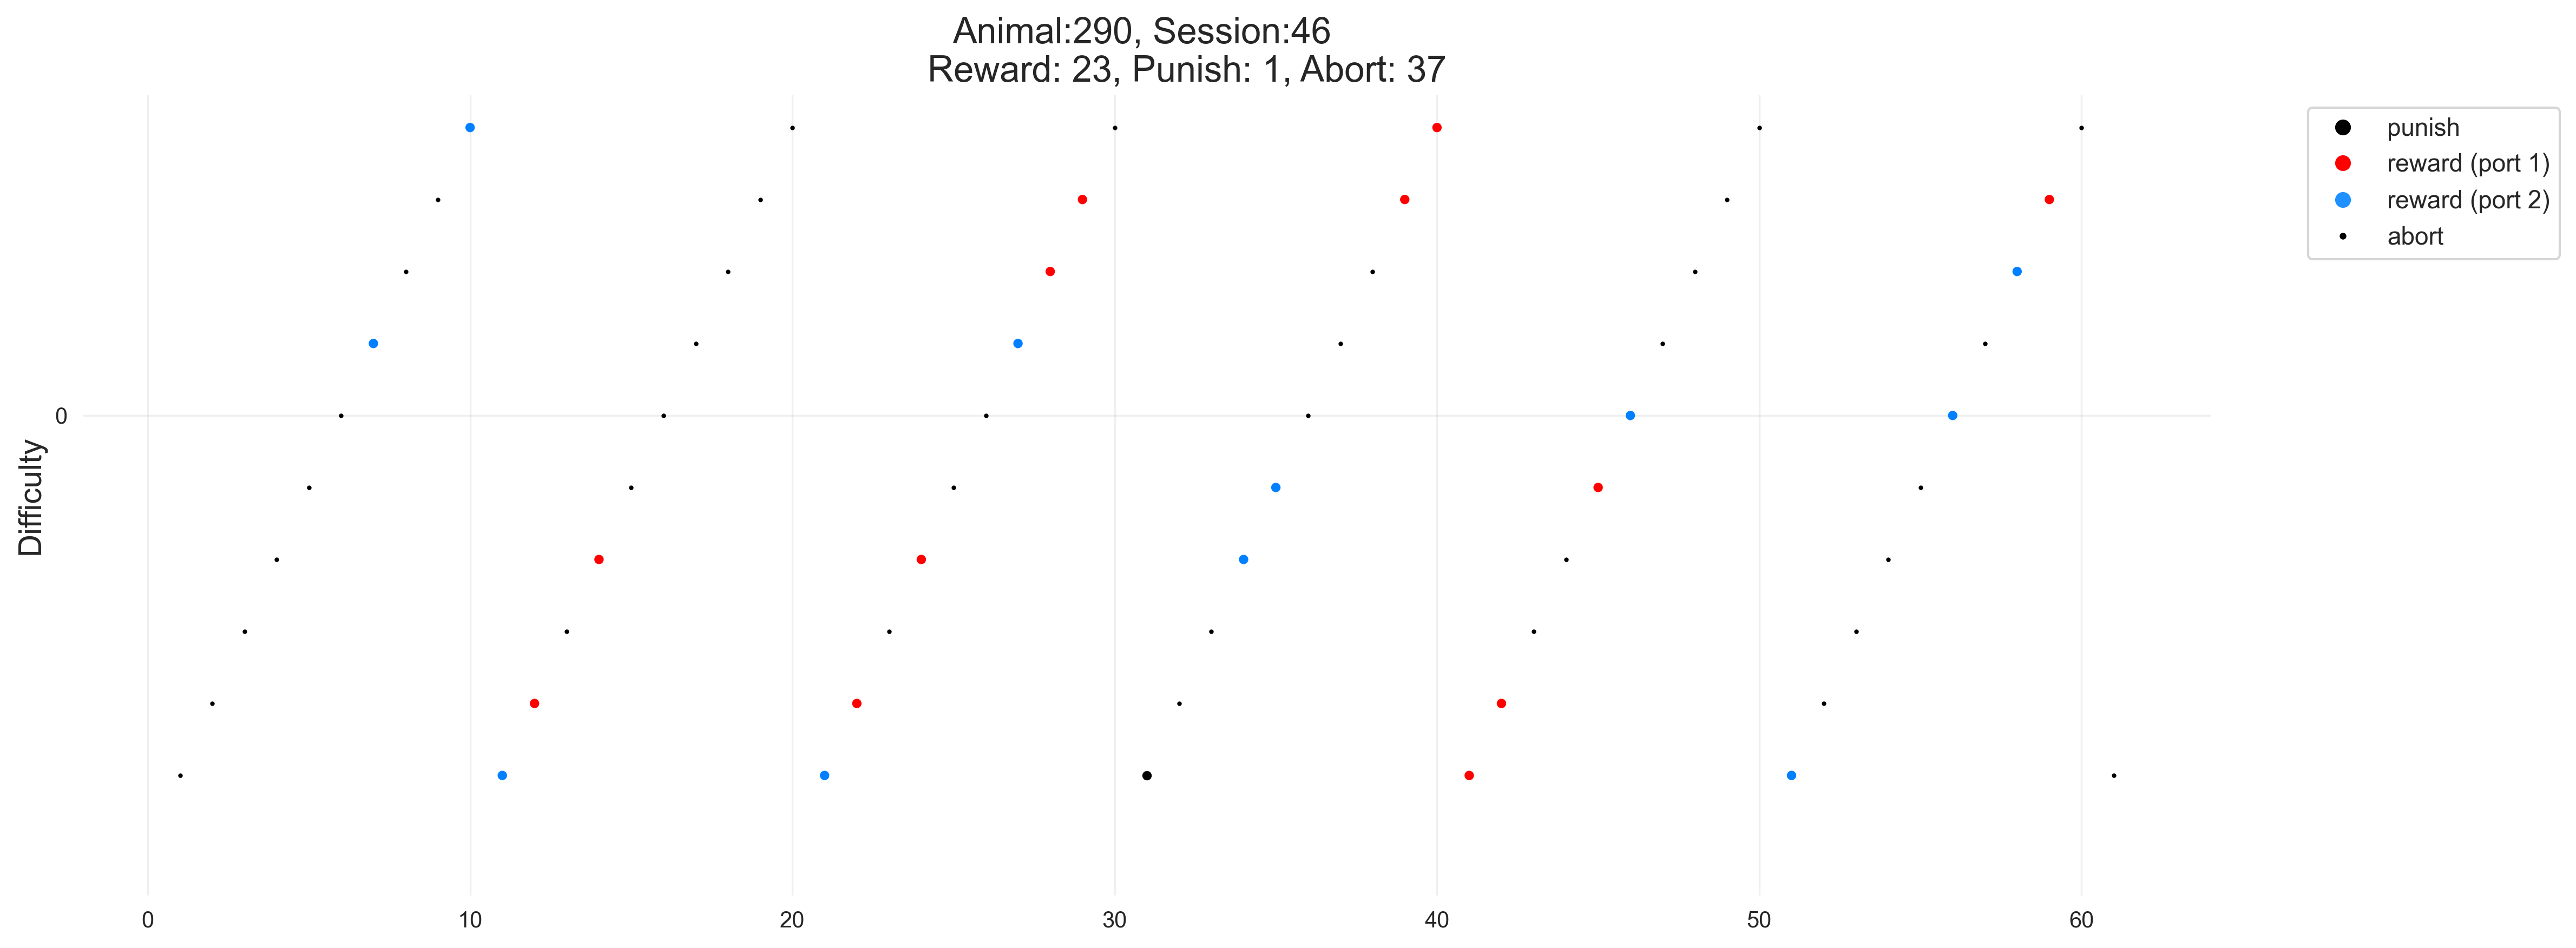

In [5]:
# Plot trial outcomes across difficulty levels
# difficultyPlot() creates comprehensive visualization of trial outcomes over time
# Parameters: animal_id (int), session (int), save_path (str)
# Shows: reward/punish/abort trials color-coded by response port and difficulty

difficultyPlot(animal_id, session)

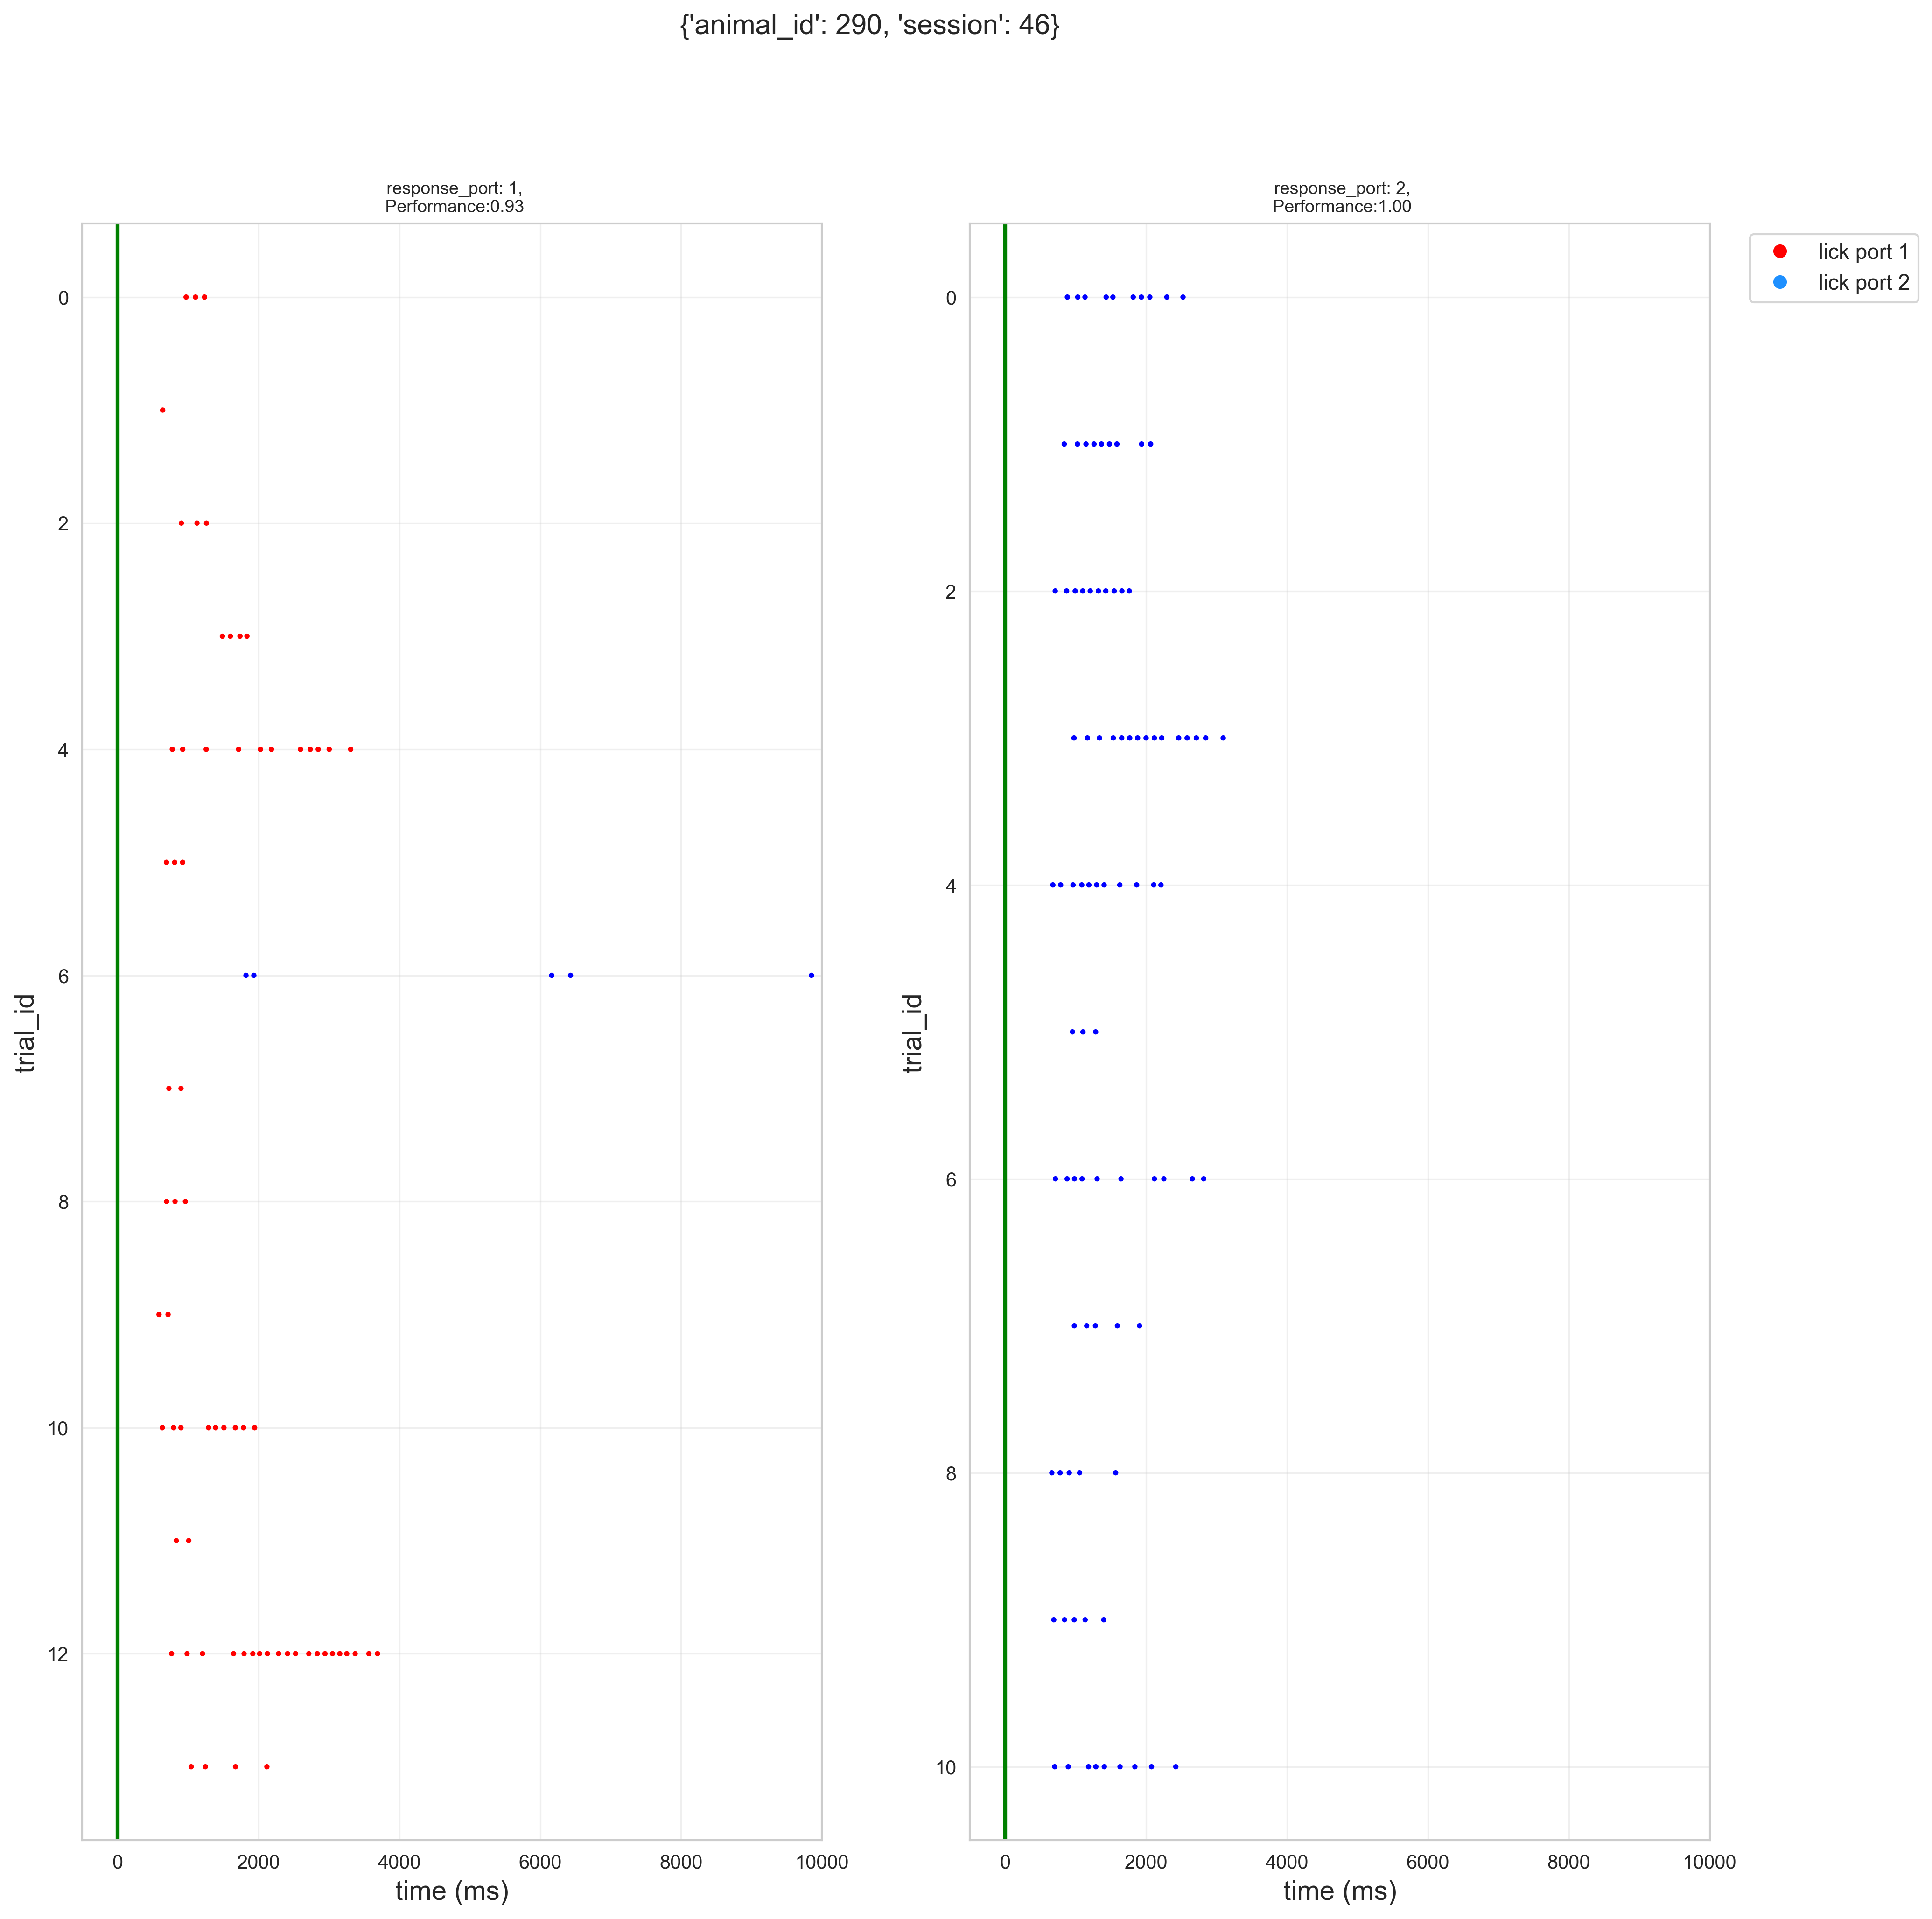

port: 2
 mean licks: 7.363636363636363
 trials count: 11
port: 1
 mean licks: 4.7272727272727275
 trials count: 11


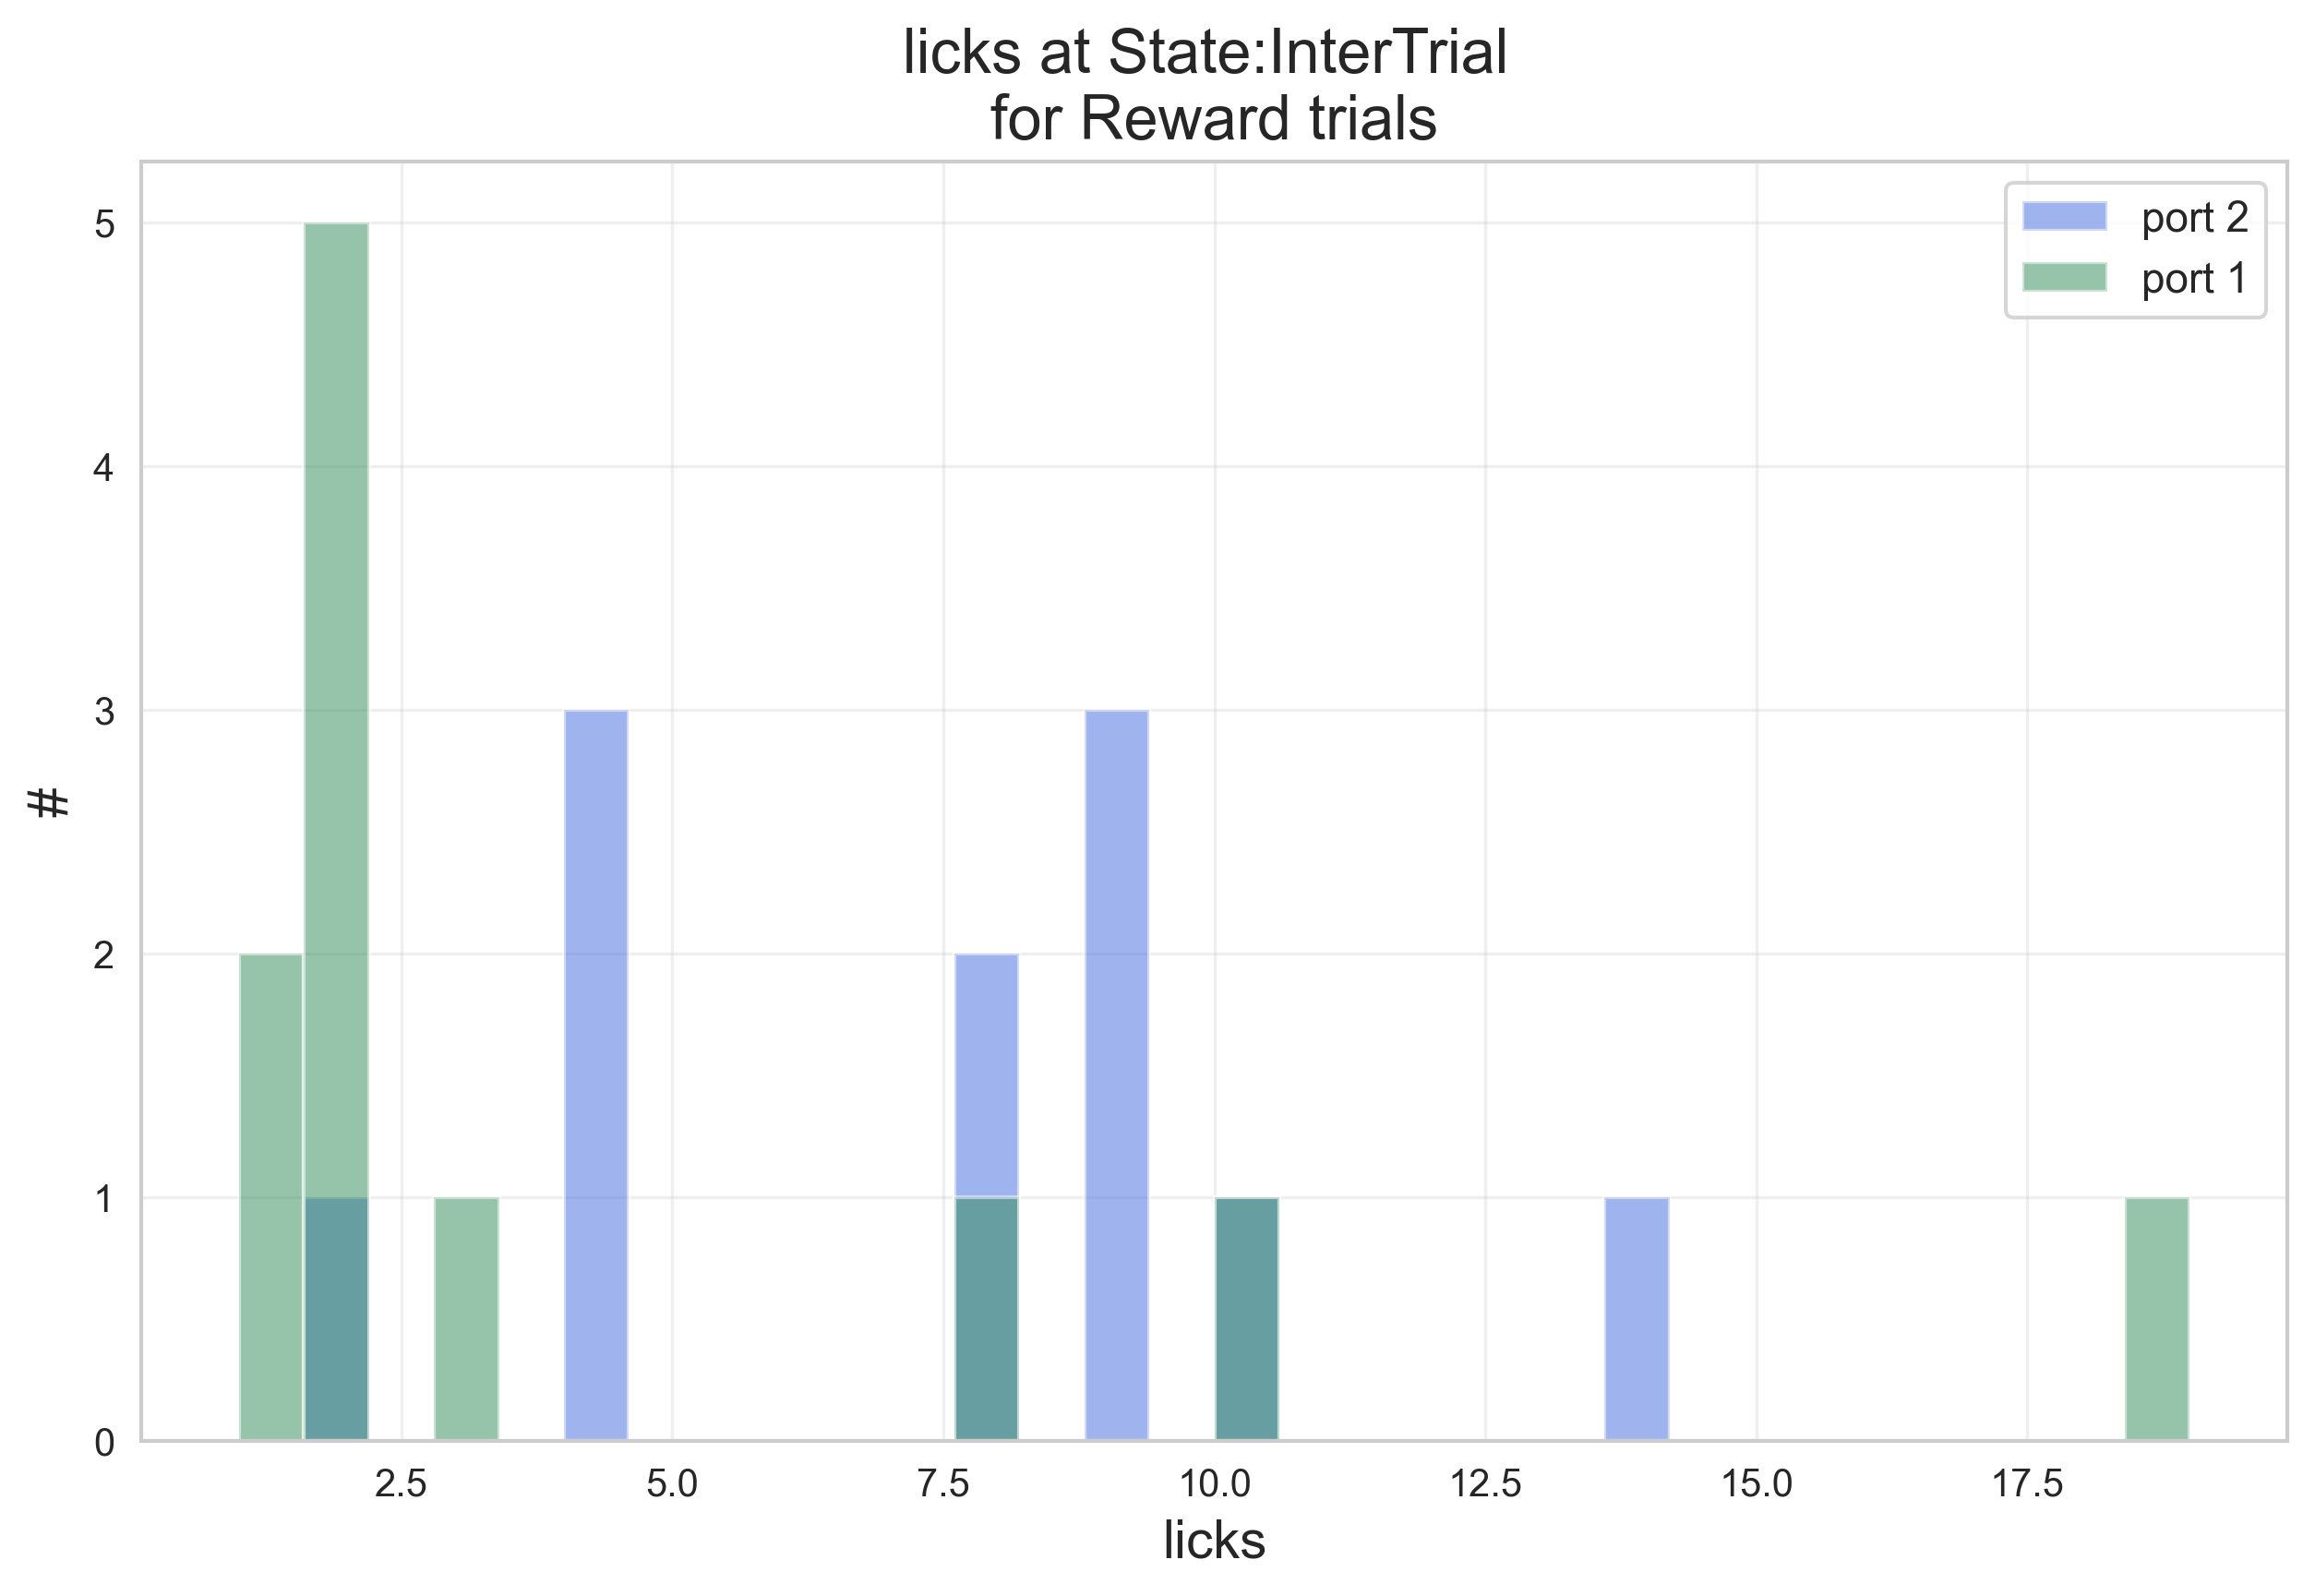

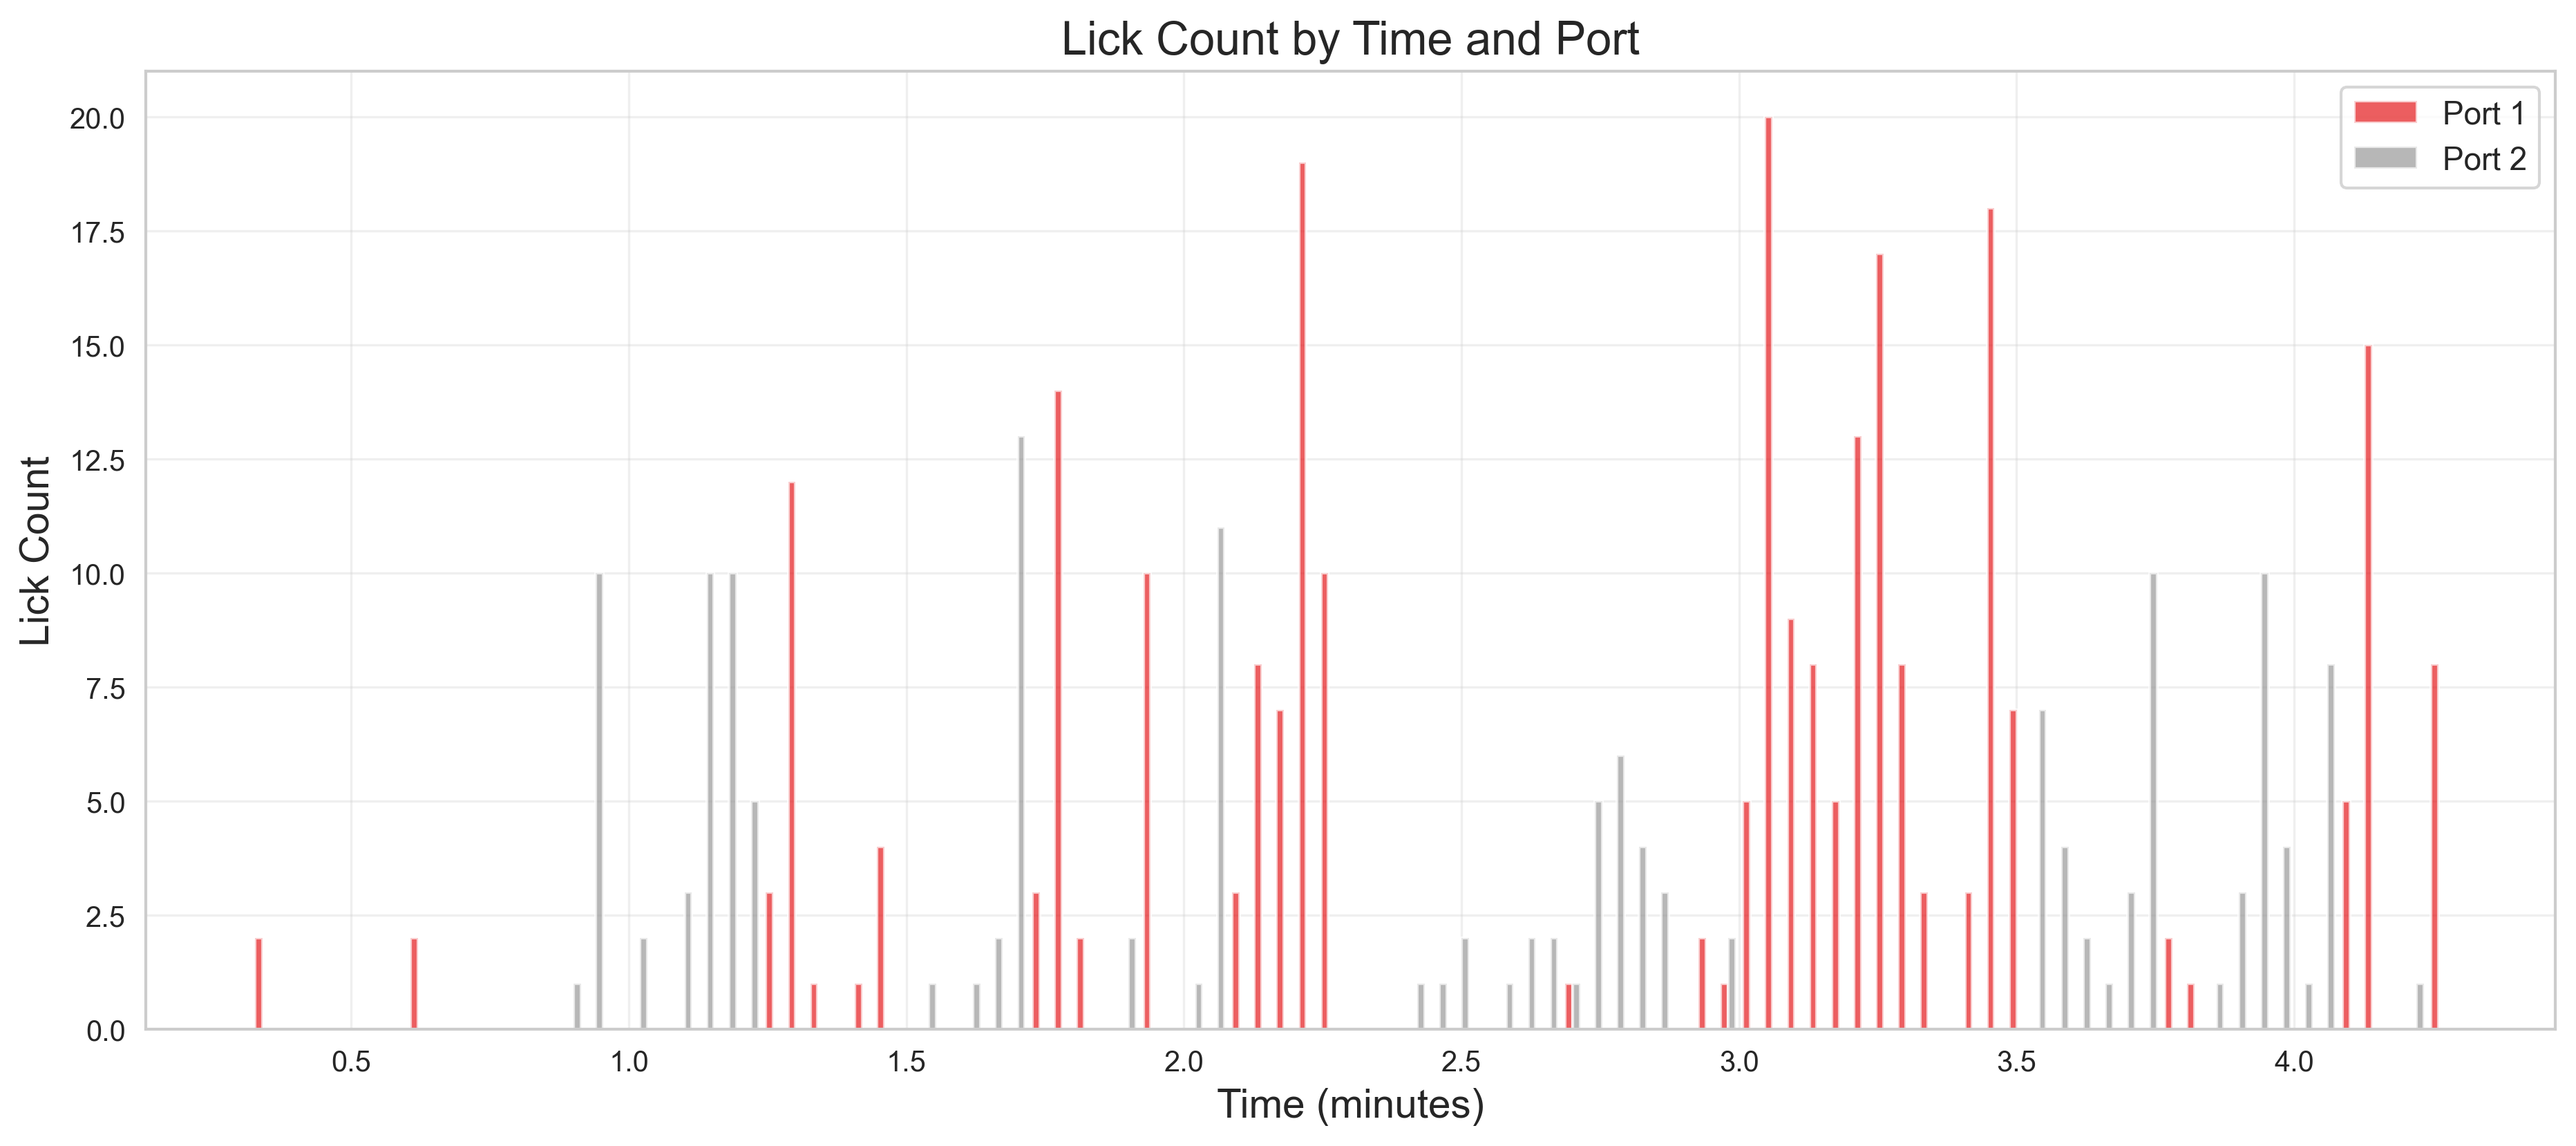

############### last date: 2025-07-16, amount: 144.0 ###############


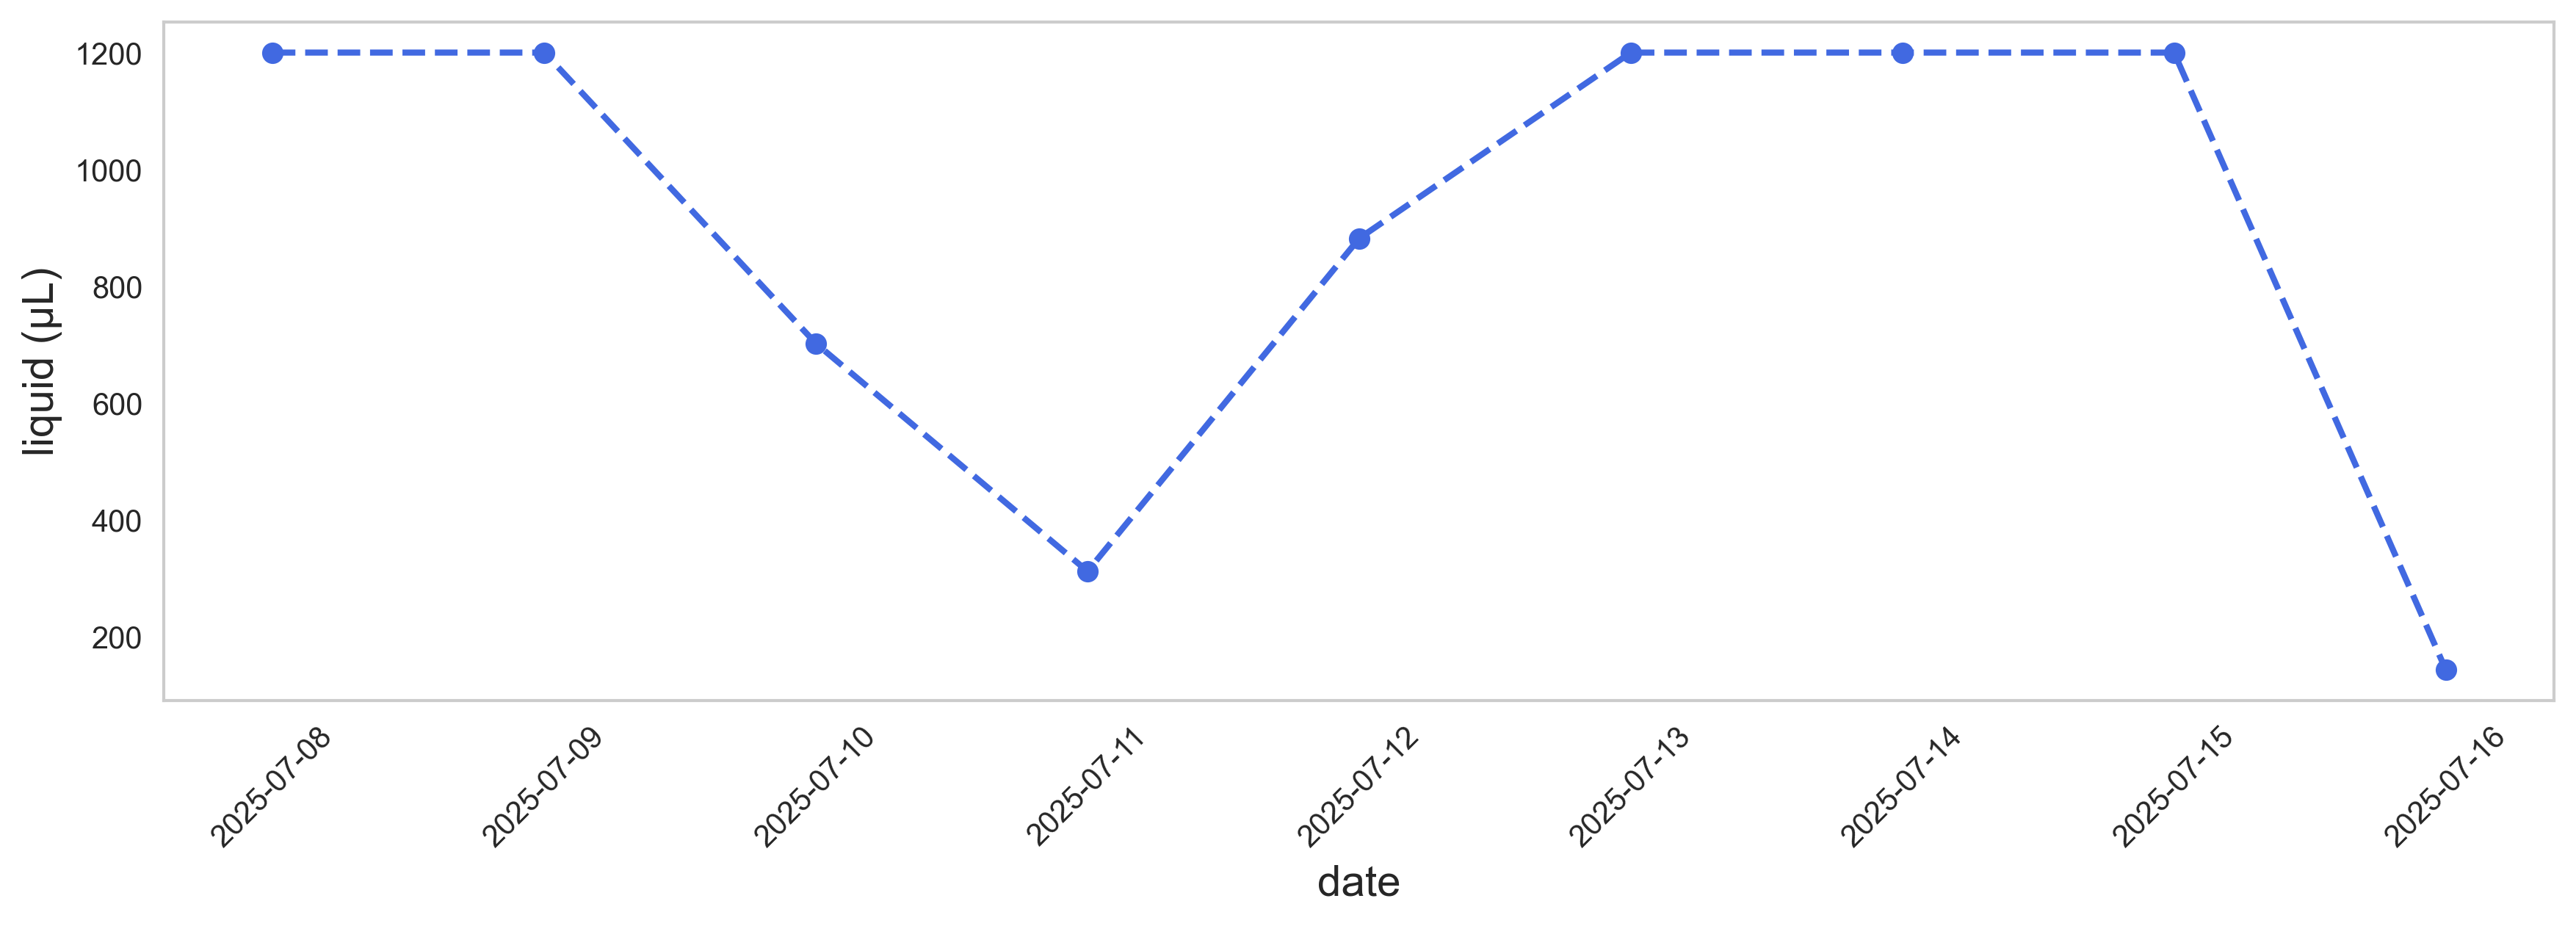

In [6]:
# Licking behavior analysis
# LickPlot() generates lick plots across conditions
# Parameters: 
# animal_id (int), session (int), 
# conds_split (List[str]): a list of conditions to seperate the licks
# state_start (str): the state to start plotting from, defaults to 'Trial'
# stim_table (datajoint.query): the table containing stimulus information, defaults to stimulus.StimCondition()
# color_rew_pun (bool): whether to color by reward/punish
# difficulty (int): the difficulty level of the task
# period (str): the time period to analyze Optional, in MatchToSample period should be 'Cue'
# save_path (str): the path to save the plot
LickPlot(animal_id, session, state_start='Trial')

# plot_licks_state() analyzes licks during specific states
# Parameters: animal_id (int), session (int), check_state (str), state_select (str), bins (int)
plot_licks_state(animal_id, session, bins=30)

# plot_licks_time() shows lick patterns over time by port
# Parameters: animal_id (int), session (int), bins (int), save_path (str)
plot_licks_time(animal_id, session, bins=100)

# liquidsPlot() shows daily liquid reward consumption
# Parameters: animal_id (int), days (int), save_path (str)
liquidsPlot(animal_id, days=15)

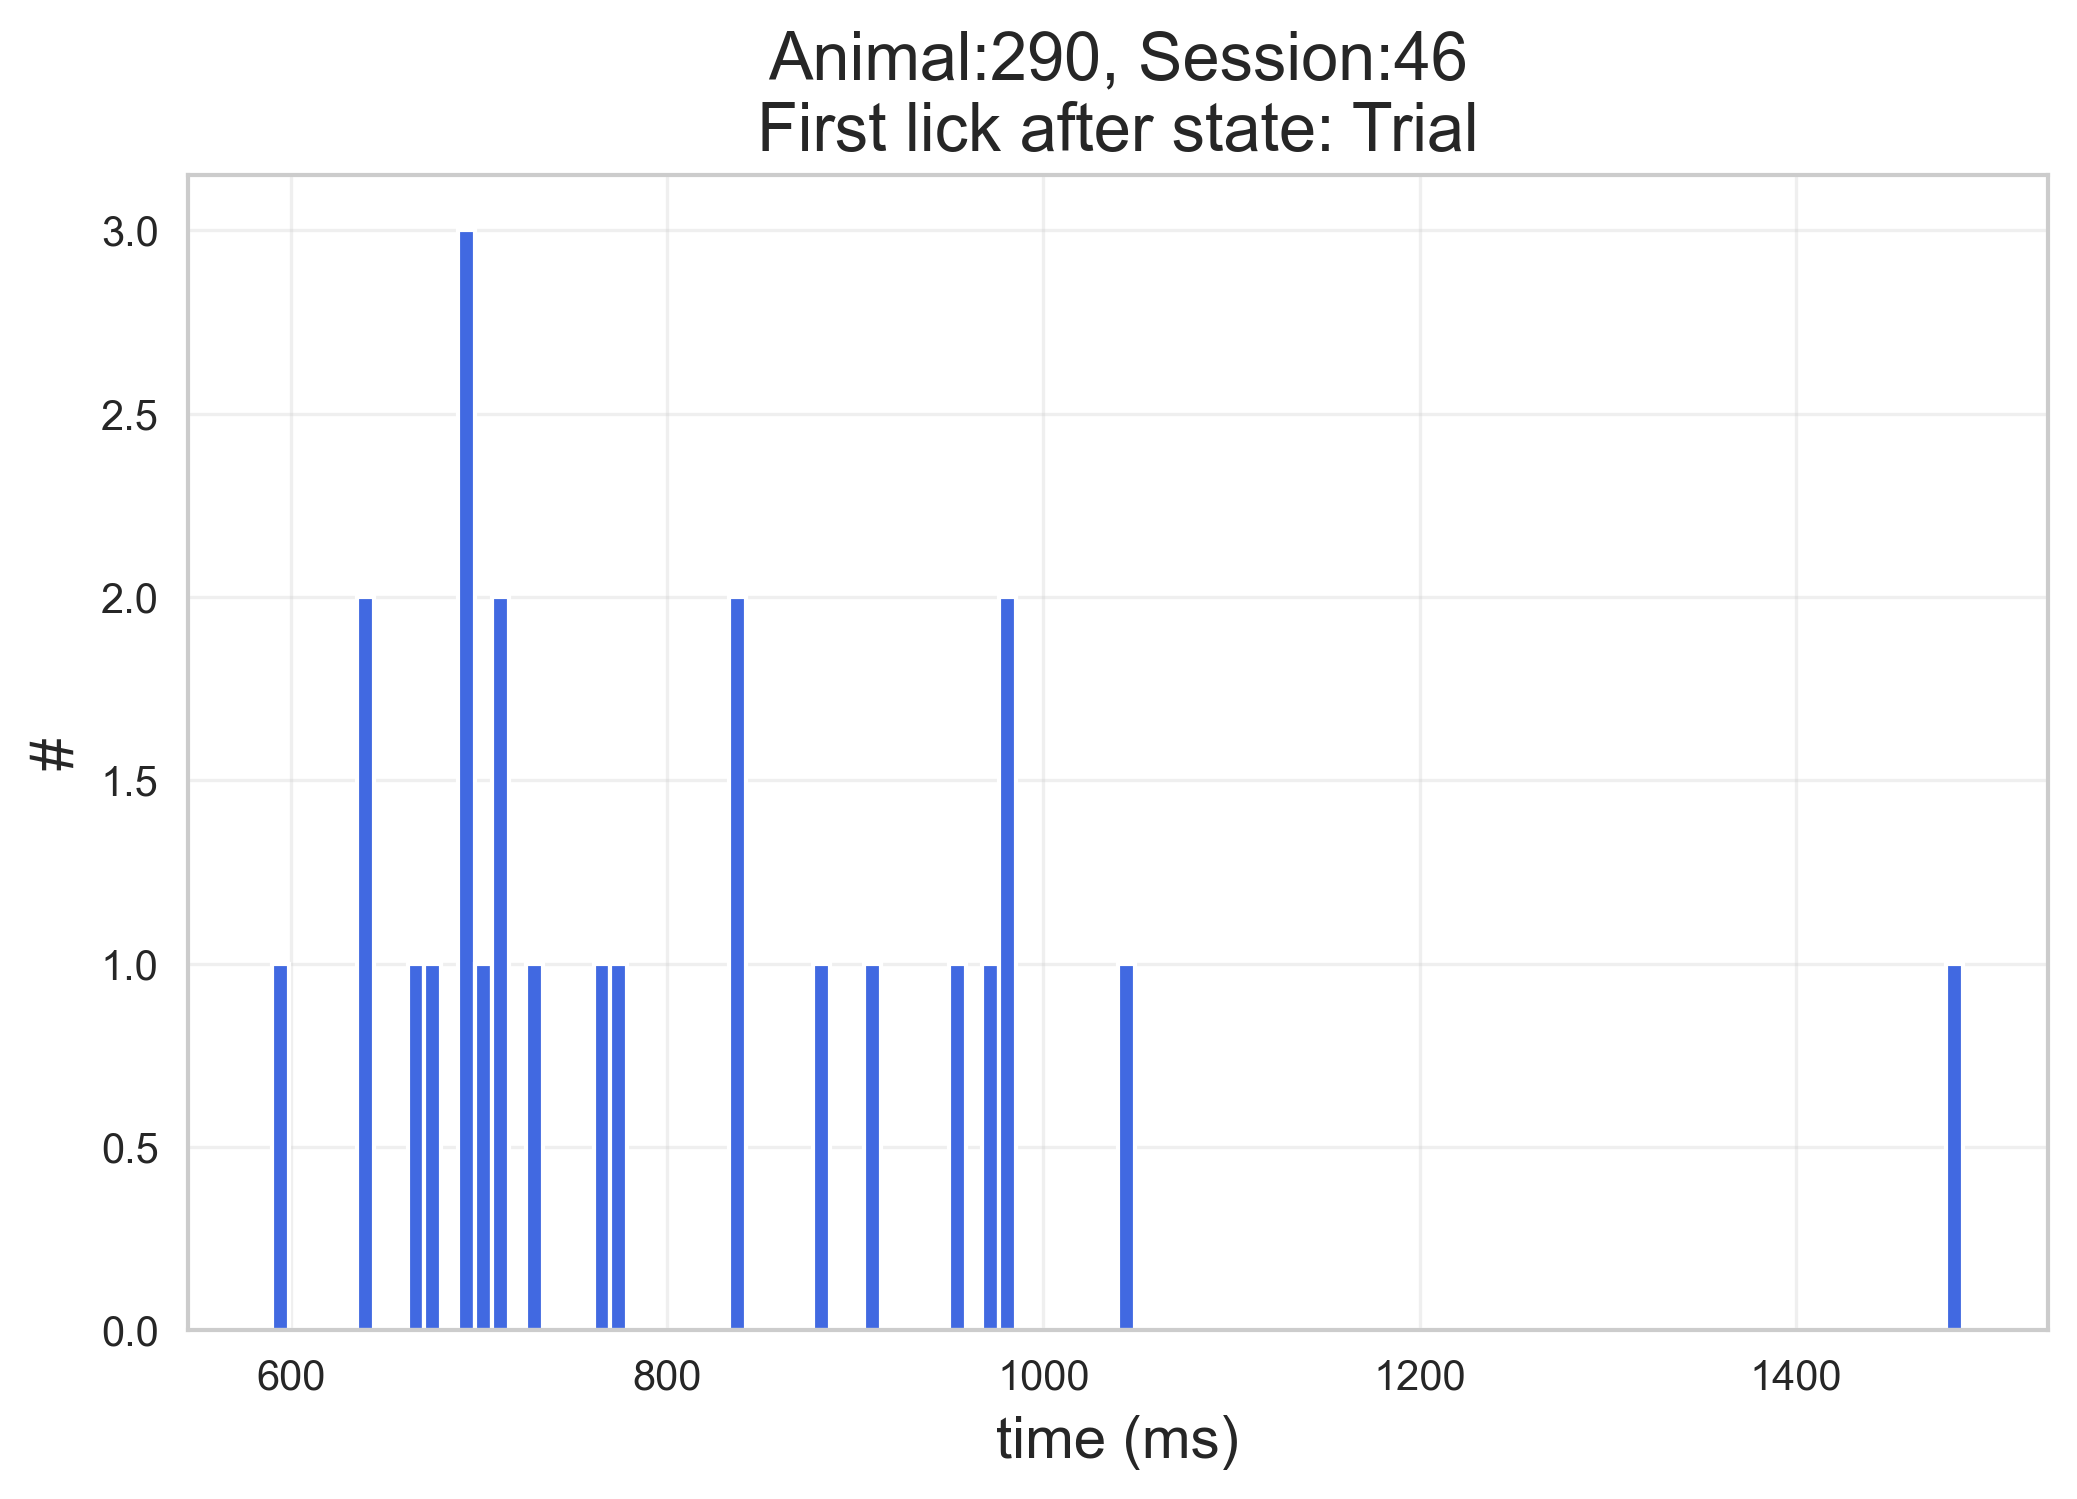

In [7]:
# Analyze first lick timing after specific states
# plot_first_lick_after() plots histogram of first lick times after a state
# Parameters: animal_id (int), session (int), state (str), sub_state (str), save_path (str)
# Returns: DataFrame with first lick data

state_first_lick = plot_first_lick_after(animal_id, session, state='Trial', sub_state='Reward')

/Users/alexandros/Documents/GitHub/ethopy_analysis/src/ethopy_analysis/plots/session.py:870: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ready_times_state = states_check.groupby("trial_idx").apply(
/Users/alexandros/Documents/GitHub/ethopy_analysis/src/ethopy_analysis/plots/session.py:870: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ready_times_state = states_check.groupby("trial_idx").apply(


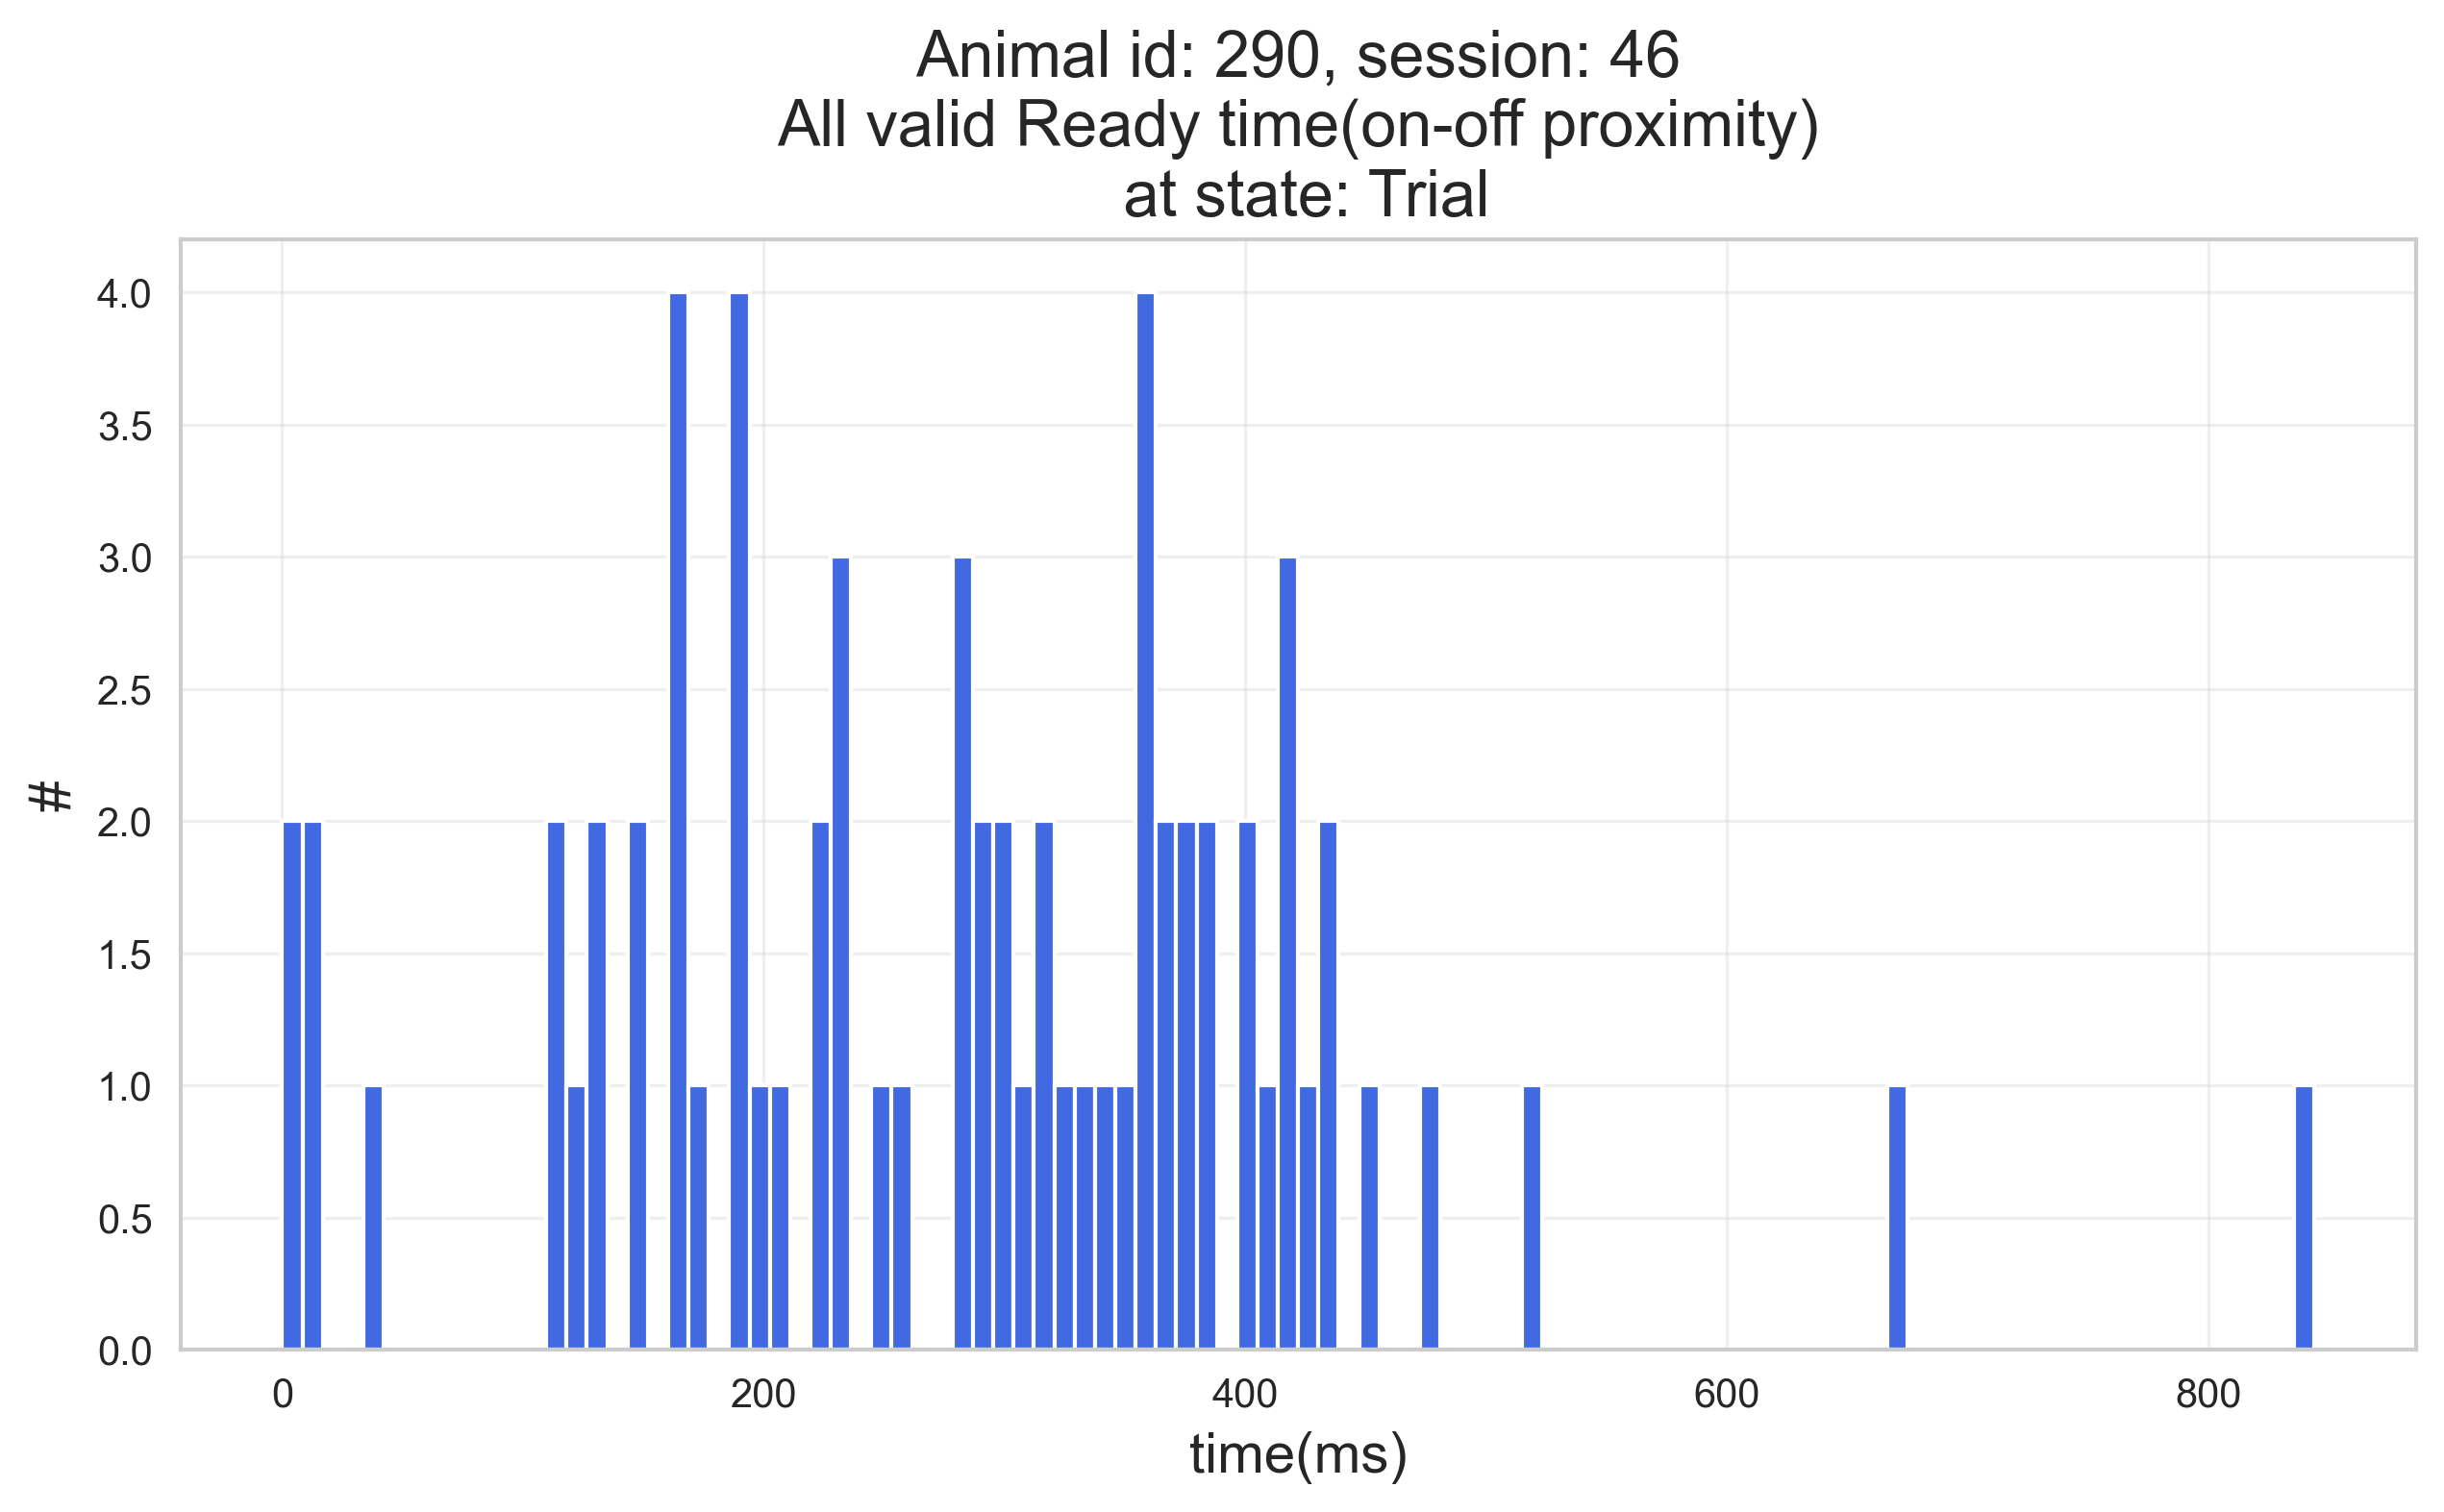

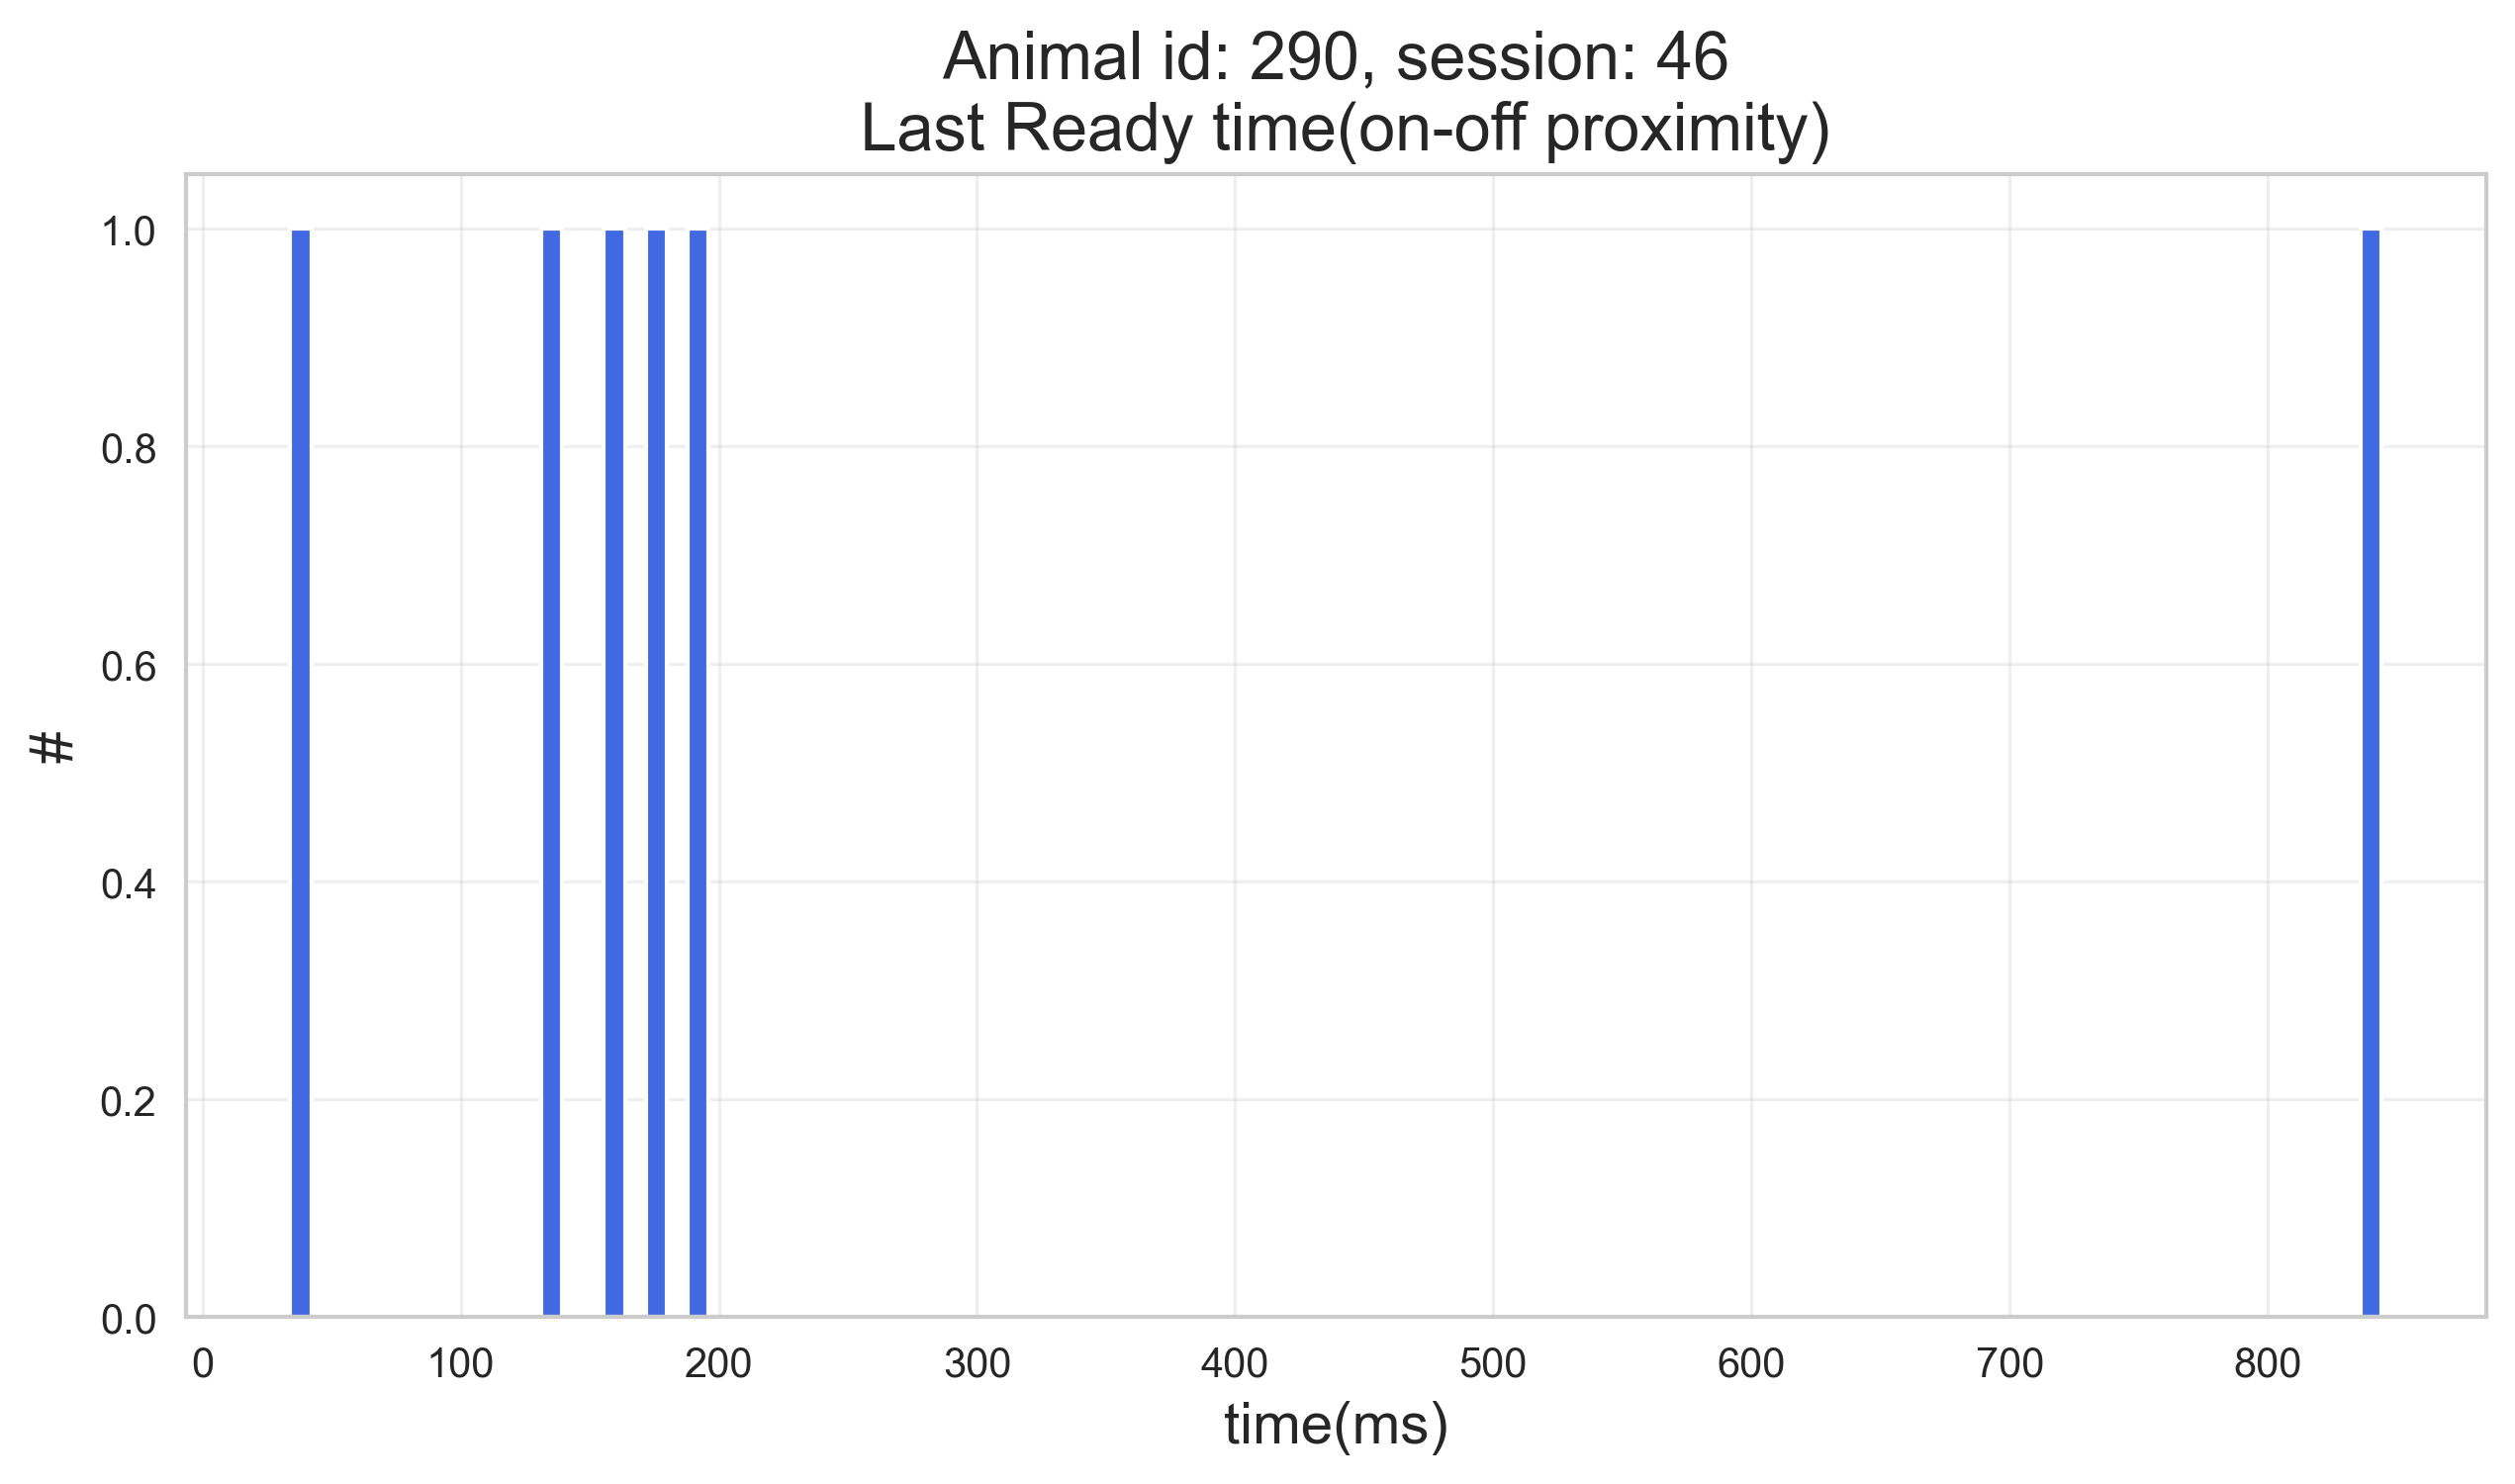

In [8]:
# Proximity sensor analysis
# valid_ready_state() calculates valid ready times for a state
# Parameters: animal_id (int), session (int), state (str)
# Returns: Series with ready times grouped by trial
ready_times_state = valid_ready_state(animal_id, session, state='Trial')

# plot_valid_proximity_state() plots histogram of valid proximity durations
# Parameters: animal_id (int), session (int), state (str), save_path (str)
plot_valid_proximity_state(animal_id, session, state="Trial")

# Analyze last ready time per trial
last_on_off = [readys[-1] for readys in ready_times_state if len(readys) > 1]

plt.figure(figsize=(10, 5))
plt.hist(last_on_off, bins=100)
plt.title(f"Animal id: {animal_id}, session: {session}\n Last Ready time(on-off proximity)")
plt.xlabel("time(ms)")
plt.ylabel("#")
plt.show()

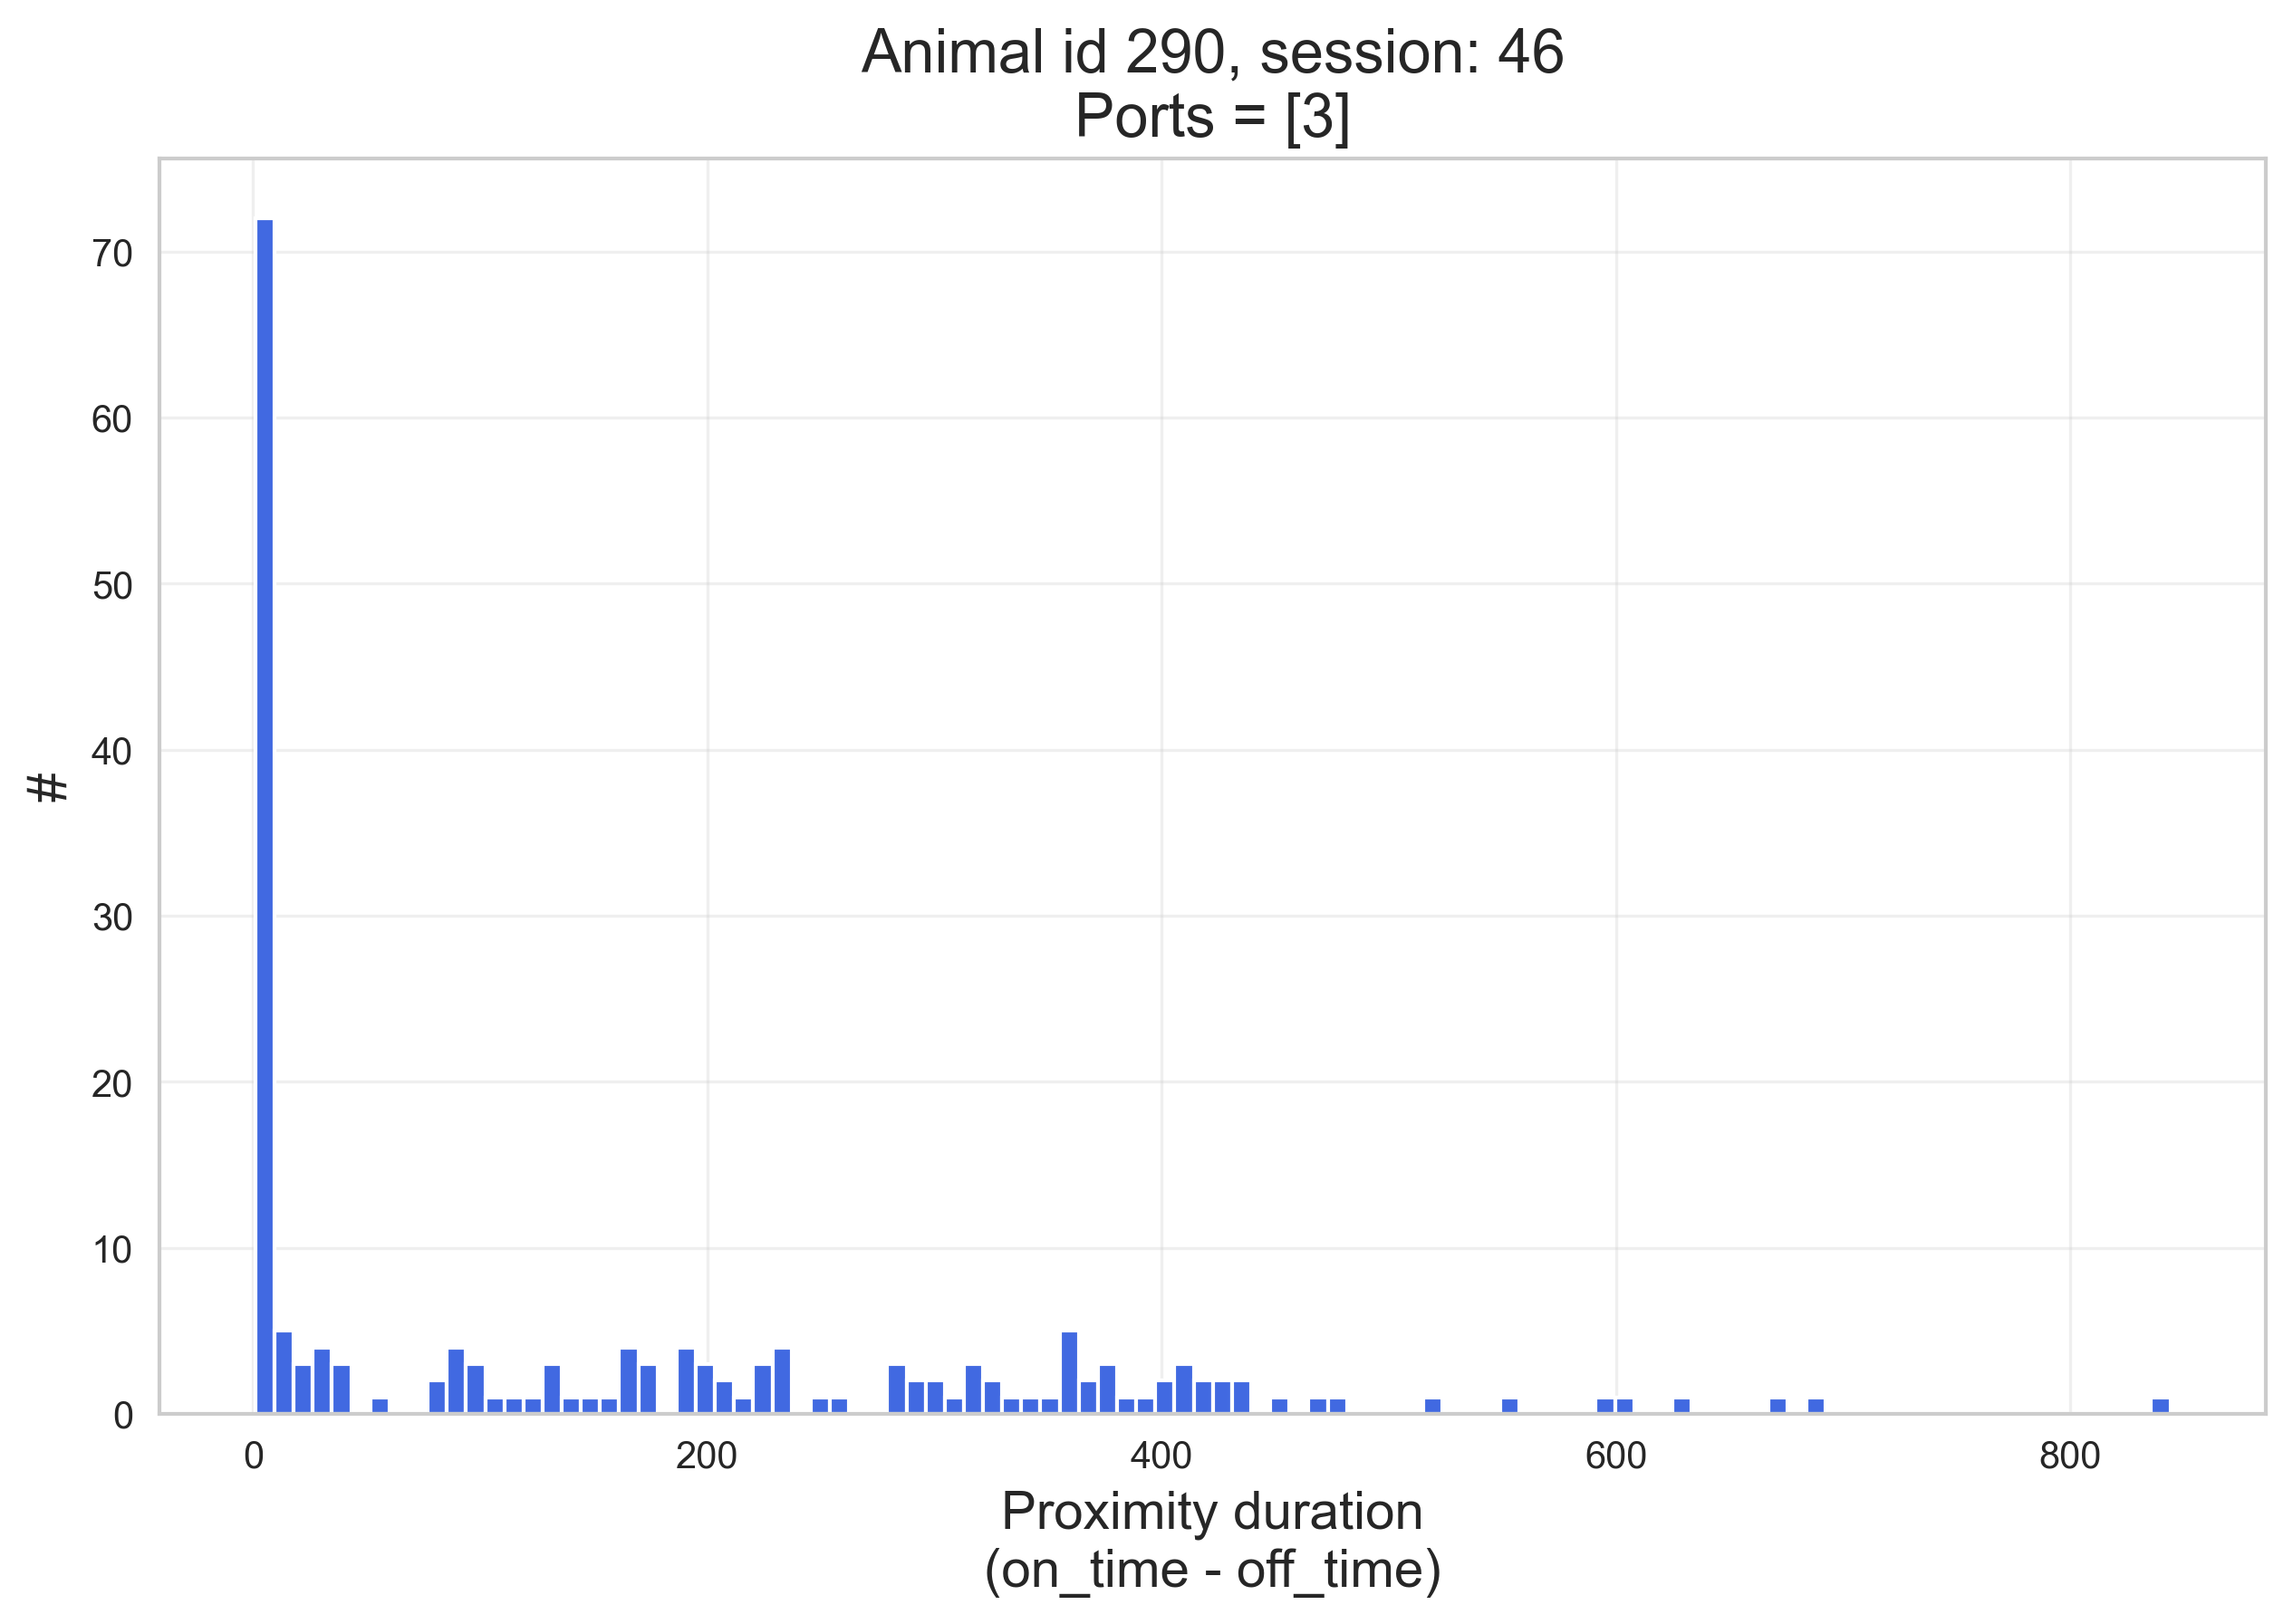

,animal_id,session,trial_idx,port,time_on,in_position,time_off,duration


In [9]:
# Proximity duration analysis
# plot_proximities_dur() plots histogram of proximity durations
# Parameters: animal_id (int), session (int), ports (List[int]), save_path (str)
plot_proximities_dur(animal_id, session, bins=100)

# calculate_proximity_duration() computes duration of proximity sensor activations
# Parameters: animal_id (int), session (int), ports (List)
# Returns: DataFrame with time_on, time_off, duration columns
prox_duration = calculate_proximity_duration(animal_id, session)

# Check for unusually long proximity durations (>5 seconds)
prox_duration.loc[prox_duration['duration'] > 5000]

states of Trial
   animal_id  session  trial_idx   time       state  time_spend
0        290       46         10  66284    PreTrial       102.0
1        290       46         10  66386       Trial       879.0
2        290       46         10  67265      Reward        33.0
3        290       46         10  67298  InterTrial      1687.0
4        290       46         11  68985    PreTrial      1121.0
5        290       46         11  70106       Trial       744.0
6        290       46         11  70850      Reward        34.0
7        290       46         11  70884  InterTrial        -0.0
Licks of Trial
    animal_id  session  trial_idx  port   time
0         290       46         10     2  67224
1         290       46         10     2  67412
2         290       46         10     2  67533
3         290       46         10     2  67647
4         290       46         10     2  67752
5         290       46         10     2  67866
6         290       46         10     2  67972
7         290    

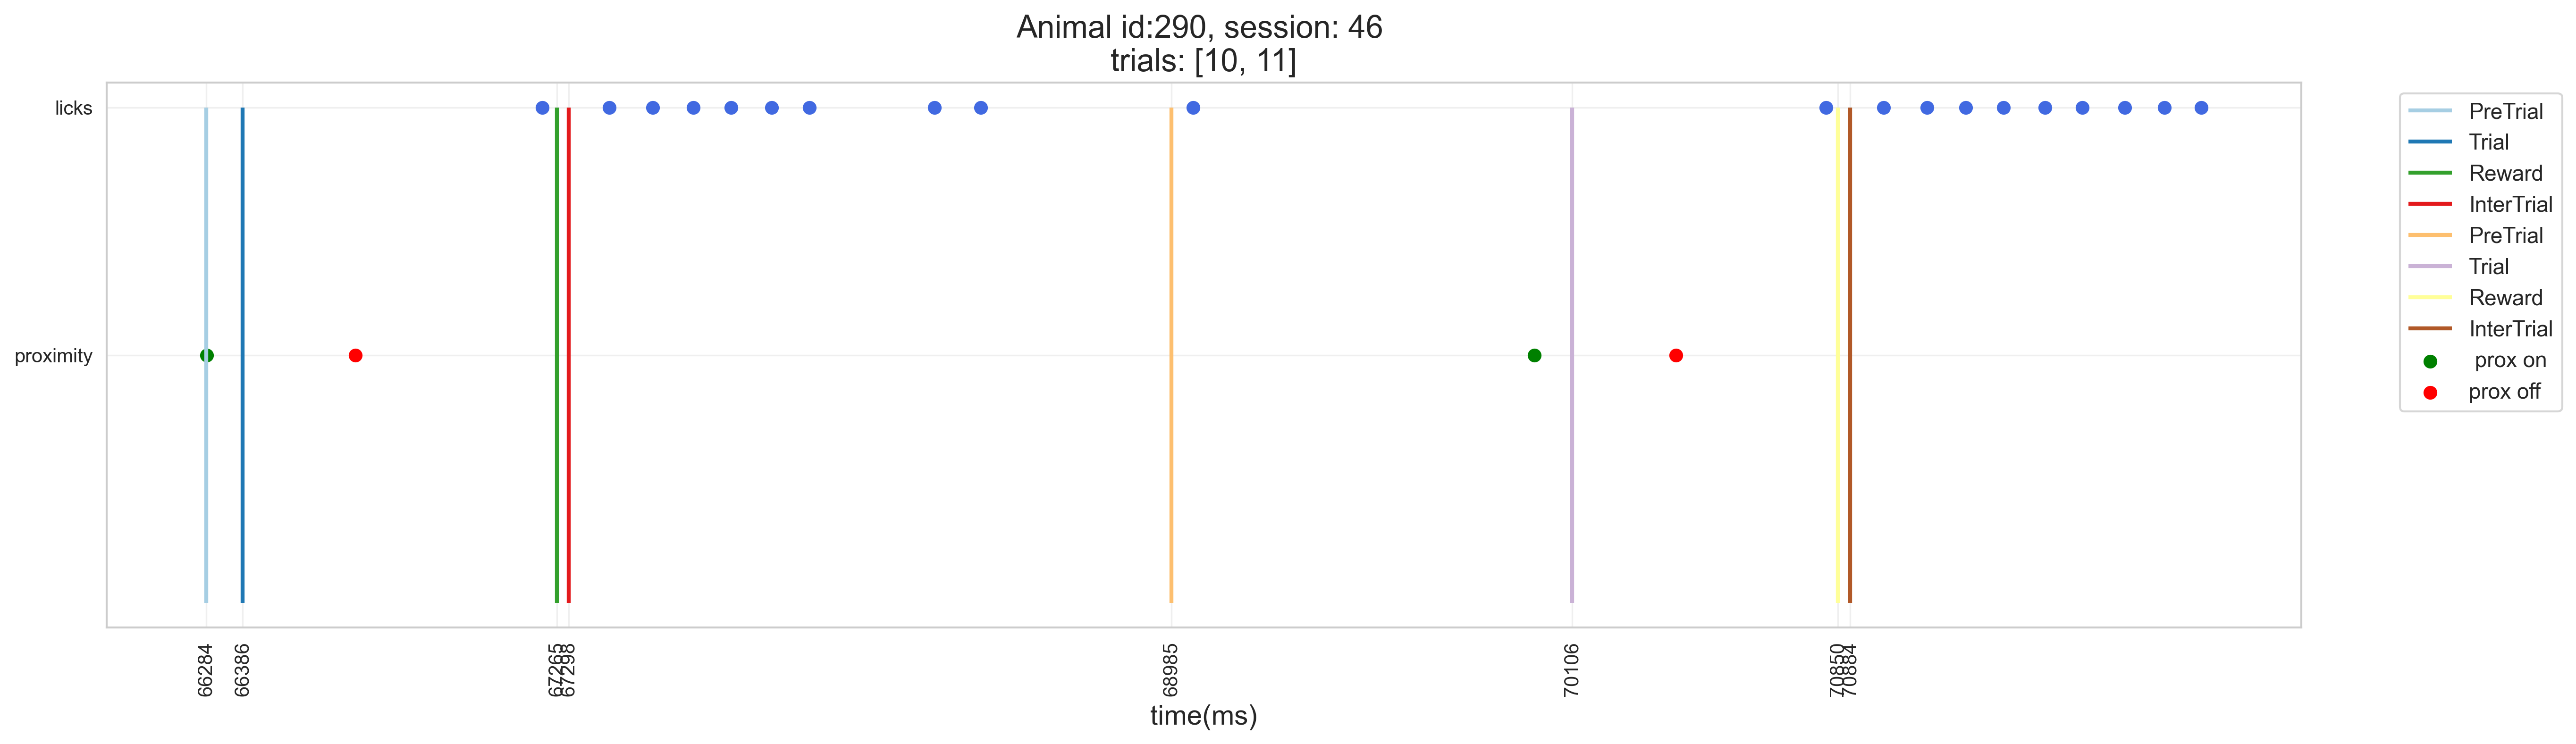

In [10]:
# Plot detailed timeline for specific trials
# plot_trial_time() creates comprehensive timeline showing states, licks, and proximity
# Parameters: animal_id (int), session (int), trials (List[int]), display_tables (bool), 
#            port (int), save_path (str)
# Returns: Tuple[DataFrame, DataFrame, DataFrame] - (trial_states, trial_licks, trial_prox)

trial_states, trial_licks, trial_prox = plot_trial_time(animal_id, session, trials=[10, 11])

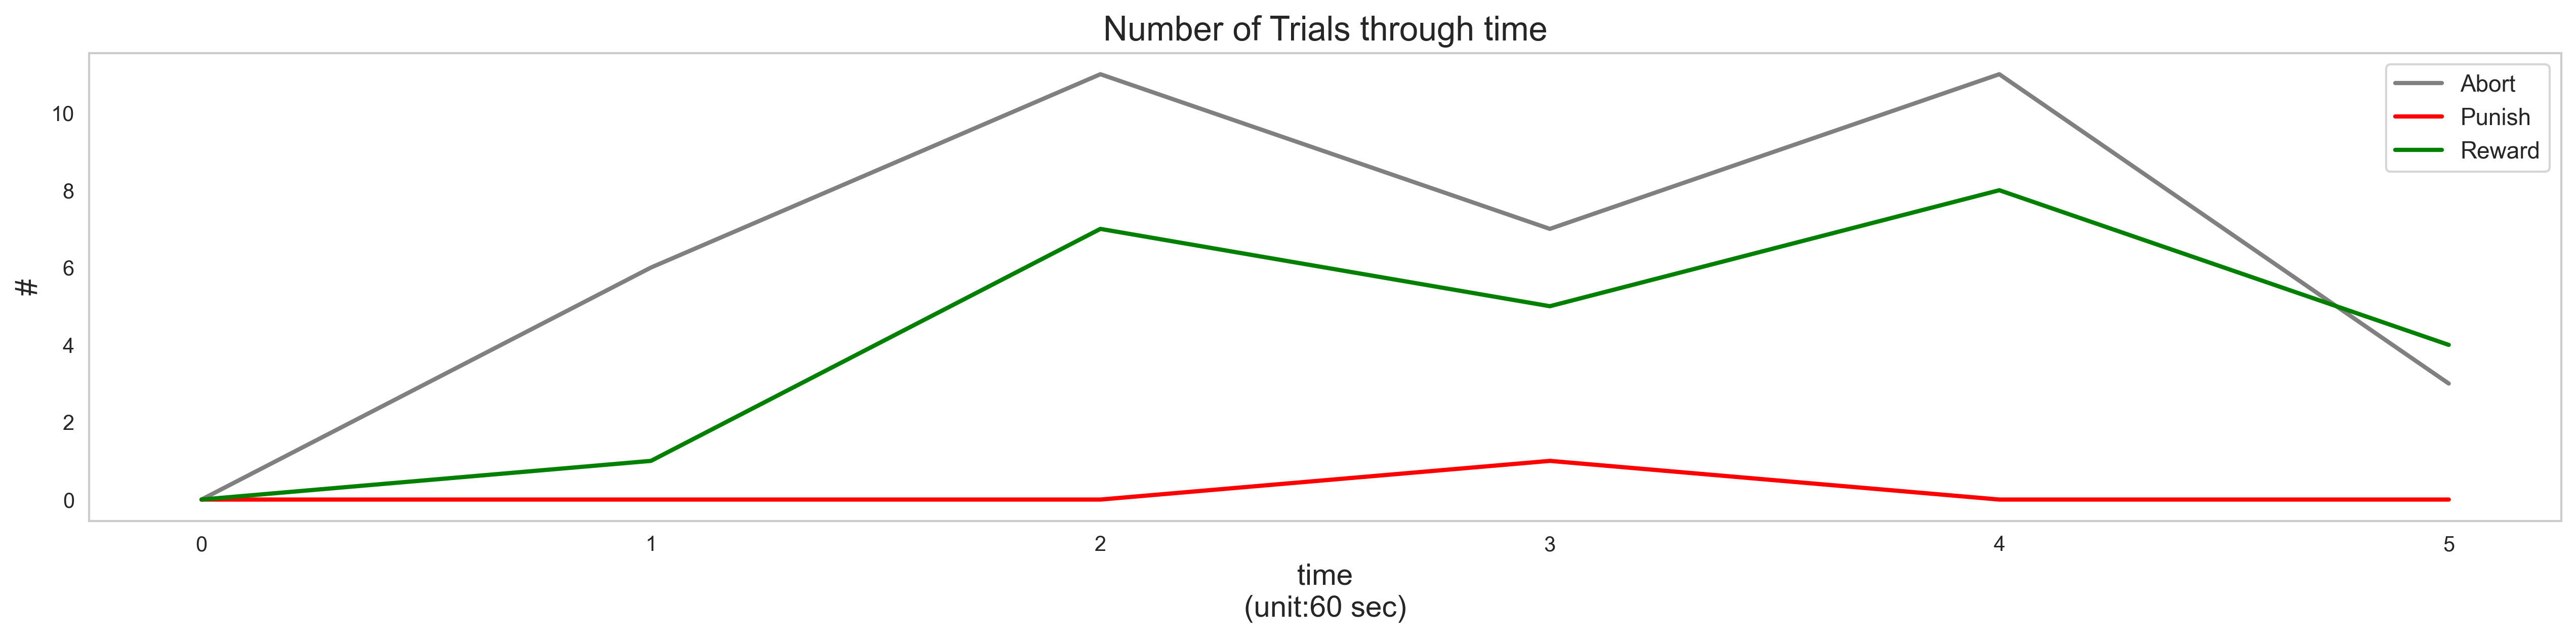

In [11]:
# Plot trial outcomes over time
# plot_states_in_time() shows distribution of trial states across session timeline
# Parameters: animal_id (int), session (int), seconds (int), save_path (str)
# Shows: Reward, Punish, Abort states binned by time

plot_states_in_time(animal_id, session, seconds=60)